In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data=pd.read_csv('Huntington_Disease_Dataset.csv')
df=pd.DataFrame(data)

In [24]:
df.head(3)

,Patient_ID,Age,Sex,Family_History,HTT_CAG_Repeat_Length,Motor_Symptoms,Cognitive_Decline,Chorea_Score,Brain_Volume_Loss,Functional_Capacity,...,HTT_Gene_Expression_Level,Protein_Aggregation_Level,Random_Protein_Sequence,Random_Gene_Sequence,Disease_Stage,Gene/Factor,Chromosome_Location,Function,Effect,Category
0,b2a49170-8561-4665-9371-2240b55dd87a,31,Male,No,67,Moderate,Severe,8.80,3.20,94,...,1.67,0.58,DAHKIRSPMRVGPHYYAQCDNNDTGSDKEHWLKTEAAPMTMDRTVE...,GCCAGCAGCGCCCGAGCGTATGAGGTATATGGATTGGACATTGGGC...,Middle,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
1,f5fae45d-8718-41c4-a957-6928f79f3c8e,33,Female,Yes,38,Severe,Moderate,3.24,5.98,50,...,0.18,0.30,PANGFWYHNCLRFWNIPPYVMEGFPLADITEVHKWRVSGFMCWETQ...,AGTTTTCAGTGAGACTCTTCCCCAAAAGCCTCCACTACGACAGTGT...,Pre-Symptomatic,HTT,4p16.3,CAG Trinucleotide Repeat Expansion,Neurodegeneration,Primary Cause
2,66ab0567-050b-4d56-9ec4-b676309899a6,69,Male,Yes,37,Severe,Moderate,1.01,2.82,69,...,0.90,1.04,NWHEGHGASTWKATMVAWCLMVQHAVTWKEGNTRCREMSCMNFTQL...,TATACCACCAGTGGGAAGAGTAACGATTTTGGAGCGCCCCGAGTCC...,Early,MSH3,5q14.1,Mismatch Repair,CAG Repeat Expansion,Trans-acting Modifier


In [82]:
df.shape

(48536, 21)

In [26]:
numerical_data=df.select_dtypes(include='number')
numerical_data.shape

(48536, 7)

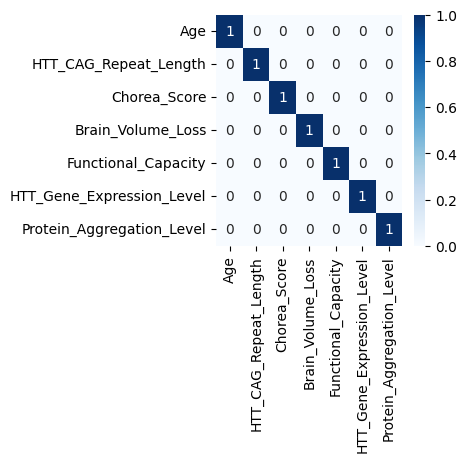

In [27]:
if numerical_data.shape[1]>=4:
  plt.figure(figsize=(3,3))
  corr=numerical_data.corr()
  sns.heatmap(corr.astype(int),fmt="d",annot=True,cmap="Blues")
  plt.show()
else:
  print("sufficient columns needed!")

<Figure size 300x300 with 0 Axes>

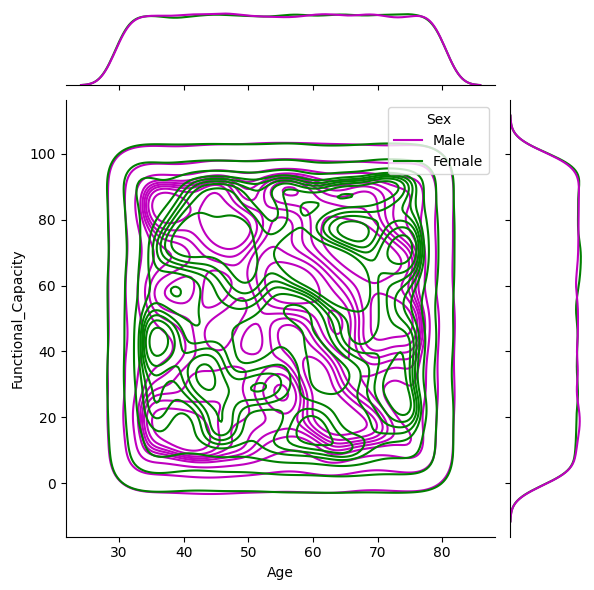

In [28]:
plt.figure(figsize=(3,3))
sns.jointplot(x='Age',y='Functional_Capacity',hue="Sex",palette=['m','g'],data=df,kind='kde')
plt.show()

In [29]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Sex,0
Family_History,0
HTT_CAG_Repeat_Length,0
Motor_Symptoms,0
Cognitive_Decline,12119
Chorea_Score,0
Brain_Volume_Loss,0
Functional_Capacity,0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48536 entries, 0 to 48535
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient_ID                 48536 non-null  object 
 1   Age                        48536 non-null  int64  
 2   Sex                        48536 non-null  object 
 3   Family_History             48536 non-null  object 
 4   HTT_CAG_Repeat_Length      48536 non-null  int64  
 5   Motor_Symptoms             48536 non-null  object 
 6   Cognitive_Decline          36417 non-null  object 
 7   Chorea_Score               48536 non-null  float64
 8   Brain_Volume_Loss          48536 non-null  float64
 9   Functional_Capacity        48536 non-null  int64  
 10  Gene_Mutation_Type         48536 non-null  object 
 11  HTT_Gene_Expression_Level  48536 non-null  float64
 12  Protein_Aggregation_Level  48536 non-null  float64
 13  Random_Protein_Sequence    48536 non-null  obj

In [51]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='Disease_Stage')
y = df['Disease_Stage']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
#to remove disease stage from the categorical data
ds=df.select_dtypes(include='object').drop(columns='Disease_Stage')

X_train,X_test,Y_train,Y_test=train_test_split(X,y_encoded,test_size=0.5,random_state=43)
categorical = X_train.select_dtypes(include='object').columns
numerical = X_train.select_dtypes(exclude='object').columns

In [65]:
preprocessing=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical),
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical)
    ],
    remainder='passthrough'
)
X_train_scaled=preprocessing.fit_transform(X_train)
X_test_scaled=preprocessing.transform(X_test)


In [54]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
gbm_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.85,
    random_state=42
)

In [56]:
xgb_model.fit(X_train_scaled,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [63]:
y_pred1=xgb_model.predict(X_test_scaled)

In [67]:
gbm_model.fit(X_train_scaled,Y_train)
y_pred2=gbm_model.predict(X_test_scaled)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score,classification_report
print(f"accuracy score and r2 score from xgb model are {accuracy_score(y_pred1,Y_test):.2f}% and,{r2_score(y_pred1,Y_test):.2f}%")
print(f"accuracy score and r2 score from gbm model are {accuracy_score(y_pred2,Y_test):.2f}% and,{r2_score(y_pred2,Y_test):.2f}%")

accuracy score and r2 score from xgb model are 0.25% and,-0.99%
accuracy score and r2 score from gbm model are 0.25% and,-1.04%


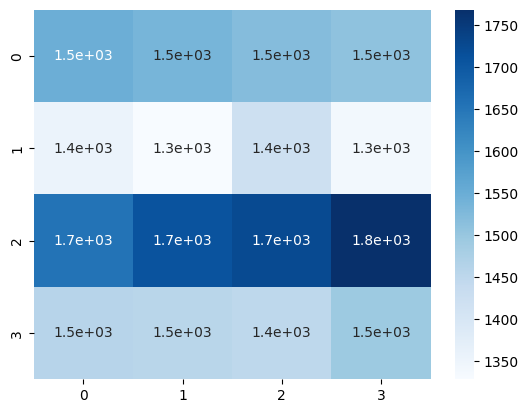

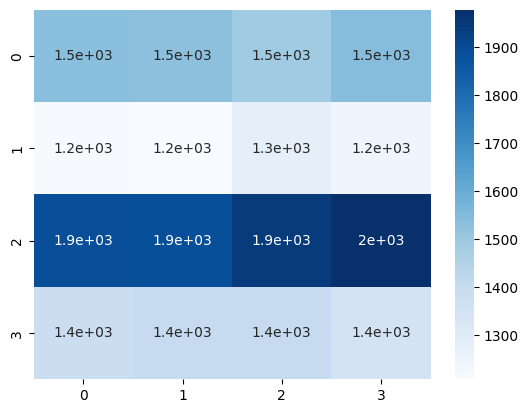

In [76]:
cm1=confusion_matrix(y_pred1,Y_test)
sns.heatmap(cm1,cmap="Blues",annot=True)
plt.show()
cm2=confusion_matrix(y_pred2,Y_test)
sns.heatmap(cm2,cmap="Blues",annot=True)
plt.show()

In [77]:
print("report for xgb:\n",classification_report(Y_test,y_pred1))
print("report for gbm:\n",classification_report(Y_test,y_pred2))

report for xgb:
               precision    recall  f1-score   support

           0       0.25      0.26      0.26      6015
           1       0.24      0.22      0.23      6027
           2       0.25      0.28      0.27      6116
           3       0.25      0.24      0.25      6110

    accuracy                           0.25     24268
   macro avg       0.25      0.25      0.25     24268
weighted avg       0.25      0.25      0.25     24268

report for gbm:
               precision    recall  f1-score   support

           0       0.25      0.26      0.25      6015
           1       0.24      0.20      0.22      6027
           2       0.25      0.32      0.28      6116
           3       0.24      0.22      0.23      6110

    accuracy                           0.25     24268
   macro avg       0.25      0.25      0.25     24268
weighted avg       0.25      0.25      0.25     24268



In [80]:
import joblib


In [81]:
joblib.dump(preprocessing, "preprocessing.pkl")
joblib.dump(xgb_model, "xgb.pkl")
joblib.dump(gbm_model, "gbm.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']